<a href="https://colab.research.google.com/github/anissssssssssssss/TDM/blob/main/preprocessing_df1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/TDM_project/Customer Purchasing Behaviors.csv')

In [ ]:
#print the first 5 rows of the dataset
df1.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [ ]:
#print the info of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


In [ ]:
# Print Qualitative Data
qualitative_attributes = df1.select_dtypes(include=['object', 'category']).columns.tolist()
print("Qualitative (categorical) attributes:", qualitative_attributes)

Qualitative (categorical) attributes: ['region']


In [ ]:
# Identify quantitative (numerical) attributes
quantitative_attributes = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Quantitative (numerical) attributes:", quantitative_attributes)

Quantitative (numerical) attributes: ['user_id', 'age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']


In [ ]:
# change region column data type from categorical to numerical

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df1['region'] = encoder.fit_transform(df1['region'])
df1.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,1,12
1,2,34,55000,350,7.0,2,18
2,3,45,65000,500,8.0,3,22
3,4,22,30000,150,3.0,0,10
4,5,29,47000,220,4.8,1,13


In [ ]:
df1['region'].unique()

array([1, 2, 3, 0])

region:
<br>0 - East
<br>1 - North
<br>2 - South
<br>3 - West

In [ ]:
#check for columns with missing values
df1.isnull().sum()

,0
user_id,0
age,0
annual_income,0
purchase_amount,0
loyalty_score,0
region,0
purchase_frequency,0


In [ ]:
# check if there are duplicates row
duplicate_rows_df = df1[df1.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
# Print the duplicate rows.
duplicate_rows_df

number of duplicate rows:  (0, 7)


,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency


- there is no duplicate rows

In [ ]:
df1.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,1.945378,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,0.867340,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,0.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,1.000000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,2.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,3.000000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,3.000000,28.000000


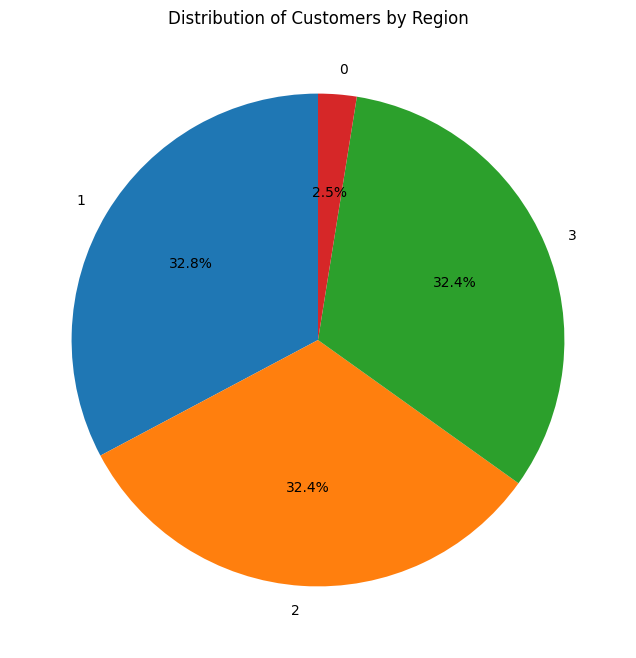

In [ ]:
# count the occurrences of each region
region_counts = df1['region'].value_counts()

# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customers by Region')

# show the plot
plt.show()

<br>- 2.5% of customer are from East
<br>- 32.8% of customers are from North
<br>- South and West customers are equal with 32.4%

##Feature Engineering

In [ ]:
#drop the user_id column
df1.drop('user_id', axis=1, inplace=True)

In [ ]:
#group the age
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)

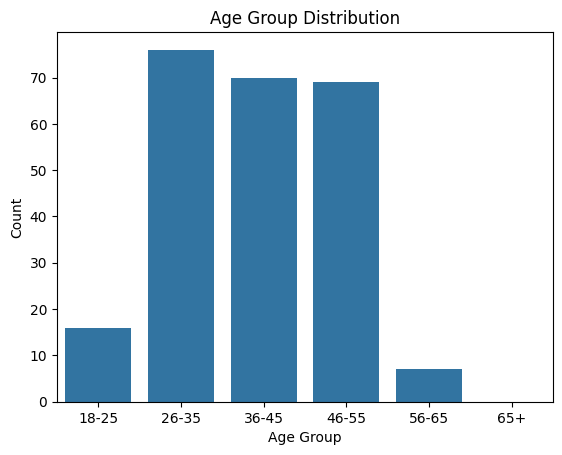

In [ ]:
#visualize the age binning in a bar chart
sns.countplot(x='age_group', data=df1)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [ ]:
#group the annual income into low, medium, and high
pd.qcut(df1['annual_income'], q=3, labels=['low', 'medium', 'high'])

,annual_income
0,low
1,medium
2,high
3,low
4,low
...,...
233,medium
234,medium
235,high
236,low


In [ ]:
#map the binned income to numerical value
income_mapping = {'low': 1, 'medium': 2, 'high': 3}
df1['income_group'] = df1['annual_income'].map(income_mapping)

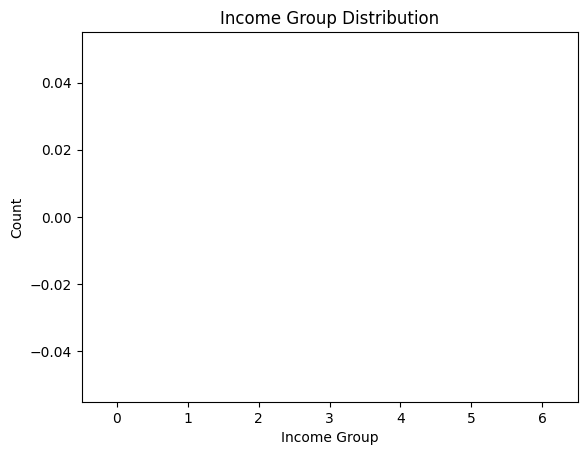

In [ ]:
#visualize the grouped income in a bar chart
sns.countplot(x='income_group', data=df1)
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.show()

In [ ]:
#calculate the average purchase value of every income group
avg_purchase_value = df1.groupby('income_group')['purchase_amount'].mean()
print(avg_purchase_value)

Series([], Name: purchase_amount, dtype: float64)


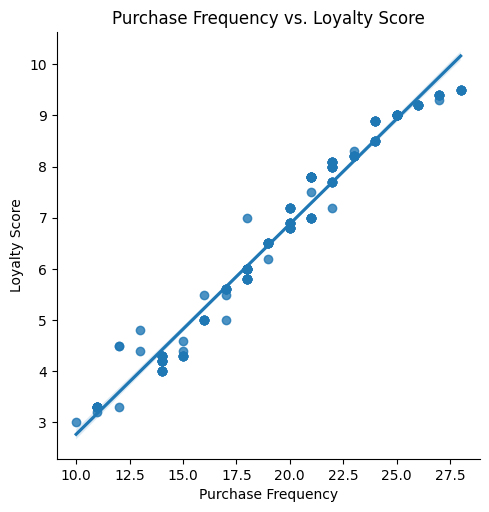

In [ ]:
#relationship between purchase frequency and loyalty score
sns.lmplot(x='purchase_frequency', y='loyalty_score', data=df1)
plt.title('Purchase Frequency vs. Loyalty Score')
plt.xlabel('Purchase Frequency')
plt.ylabel('Loyalty Score')
plt.show()

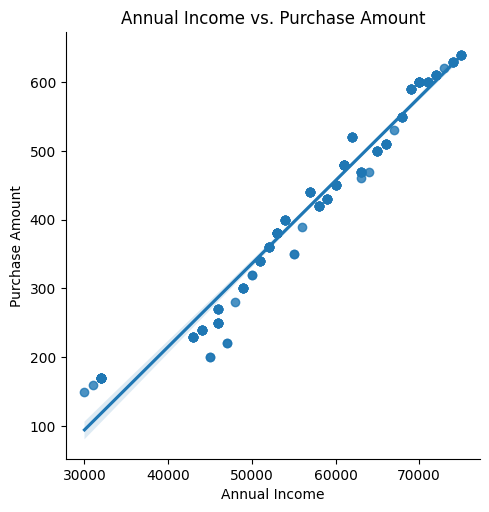

In [ ]:
#relationship between annual income and purchase amount
sns.lmplot(x='annual_income', y='purchase_amount', data=df1)
plt.title('Annual Income vs. Purchase Amount')
plt.xlabel('Annual Income')
plt.ylabel('Purchase Amount')
plt.show()

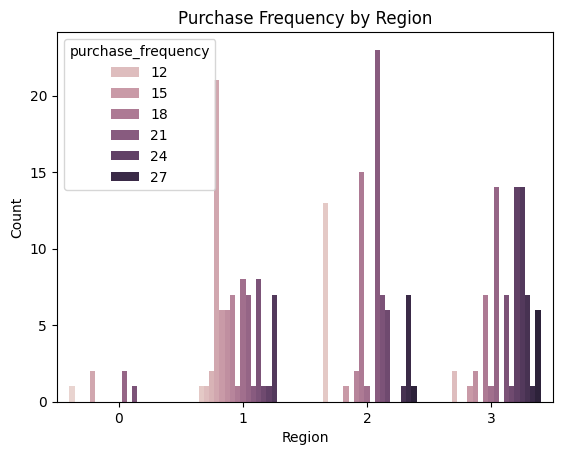

In [ ]:
#study the relationship between region and purchase frequency
sns.countplot(x='region', hue='purchase_frequency', data=df1)
plt.title('Purchase Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

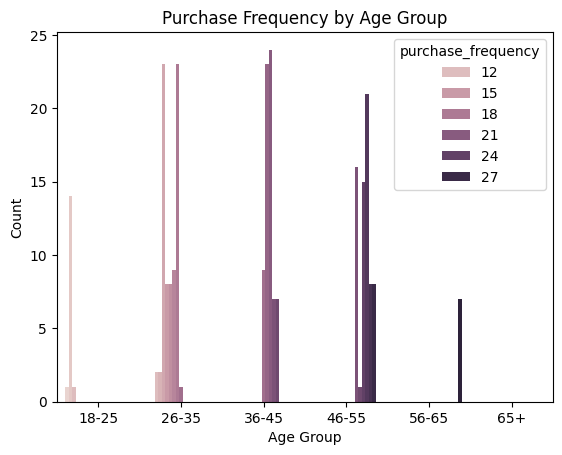

In [ ]:
#study between the age and purchase frequency
sns.countplot(x='age_group', hue='purchase_frequency', data=df1)
plt.title('Purchase Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()